In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib notebook
%matplotlib inline

PI = math.pi

In [2]:
def lu_dec(A):
    """
    Функция LU разложения матрицы
    :param A: Матрица, которую нужно разложить
    :return L, U: Мтарицы L, U
    """
    n = len(A)
    L = [[1 if i == j else 0 for i in range(n)] for j in range(n)]
    U = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = A[i][j] - sum([L[i][k] * U[k][j] for k in range(i)])
            else:
                L[i][j] = (A[i][j] - sum([L[i][k] * U[k][j] for k in range(j)])) / U[j][j]

    return L, U


def decision(arr, b=None):
    """
    Решение СЛАУ методом LU разложения
    :param arr: A|B
    :return x:
    """
    n = len(arr)
    if b is None:
        A = [[arr[i][j] for j in range(len(arr[i]) - 1)] for i in range(len(arr))]
        b = [arr[i][len(A[0])] for i in range(n)]
    else:
        A = arr

    L, U = lu_dec(A)

    # L * y  = b
    y = [0 for i in range(n)]
    for i in range(n):
        y[i] = (b[i] - sum([L[i][k] * y[k] for k in range(i)]))

    x = [0 for i in range(n)]

    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum([U[i][k] * x[k] for k in range(i + 1, n)])) / U[i][i]

    return x

# Метод квадратур

In [3]:
def volt_2_rect(K, f, a, b, h):
    """
    Метод квадратур
    
    :param K: Ядро уравнения
    :param f: Правая  часть (задаются аналитически)
    :param a: Начало отрезка интегрирования
    :param b: Конец отрезка
    :param h: Шаг сетки
    :return: Вектор y приближений к  решению в узлах сетки
    """
    x = np.arange(a, b + h/2, h)
    n = len(x)
    y = []
    A = [1/2 if k == 0 or k == n-1 else 1 for k in range(n)]
    for i in range(0, n):
        s = 0
        for j in range(0, i):
            s += A[j] * K(x[i], x[j]) * y[j]
            
        tmp = (f(x[i]) + h*s)/(1 - h * A[i] * K(x[i], x[i]))
        y.append(tmp)
        
#     print(y)
        
    return y
    

In [4]:
def volt_2_simps(K, f, a, b, h):
    """
    Метод квадратур
    
    :param K: Ядро уравнения
    :param f: Правая  часть (задаются аналитически)
    :param a: Начало отрезка интегрирования
    :param b: Конец отрезка
    :param h: Шаг сетки
    :return: Вектор y приближений к  решению в узлах сетки
    """
    x = np.arange(a, b + h/2, h)
    n = len(x)
    y = []
    A = [1 / 3 if k == 0 or k == n - 1 else 1 / 3 * (2 ** (k % 2 + 1)) for k in range(n)]
    for i in range(0, n):
        s = 0
        for j in range(0, i):
            s += A[j] * K(x[i], x[j]) * y[j]
            
        tmp = (f(x[i]) + h*s)/(1 - h * A[i] * K(x[i], x[i]))
        y.append(tmp)
        
#     print(y)
        
    return y
    

In [5]:
math.exp(-(0.02))

0.9801986733067553

In [6]:
K = lambda x, s: math.exp(-(x - s))
f = lambda x: math.exp(-x)
a = 0
b = 1
h = 0.01



y = lambda x: 1

In [7]:
K = lambda x, s: math.exp(x*x - s*s)
f = lambda x: math.exp(x*x)
a = 0
b = 1
h = 0.01



y = lambda x: math.exp(x*x + x)

In [8]:
K = lambda x, s: (1 - (x-s)*math.exp(2*x))
f = lambda x: (1 - x*math.exp(2*x))*math.cos(1) - math.exp(2*x)*math.sin(1)
a = 0
b = 2.5
h = 0.005


y = lambda x: math.exp(x)*(math.cos(math.exp(x)) - math.exp(x)*math.sin(math.exp(x)))

In [9]:
K = lambda x, s: 1
f = lambda x: 1
a = 0
b = 7
h = 0.07


y = lambda x: math.exp(x)

Введите длинну шага: h = 0.1
Среднеквадратичноая погрешность с методом трапеций: 17.510563352828672
Среднеквадратичноая погрешность с методом симпсона: 20.185988178798013


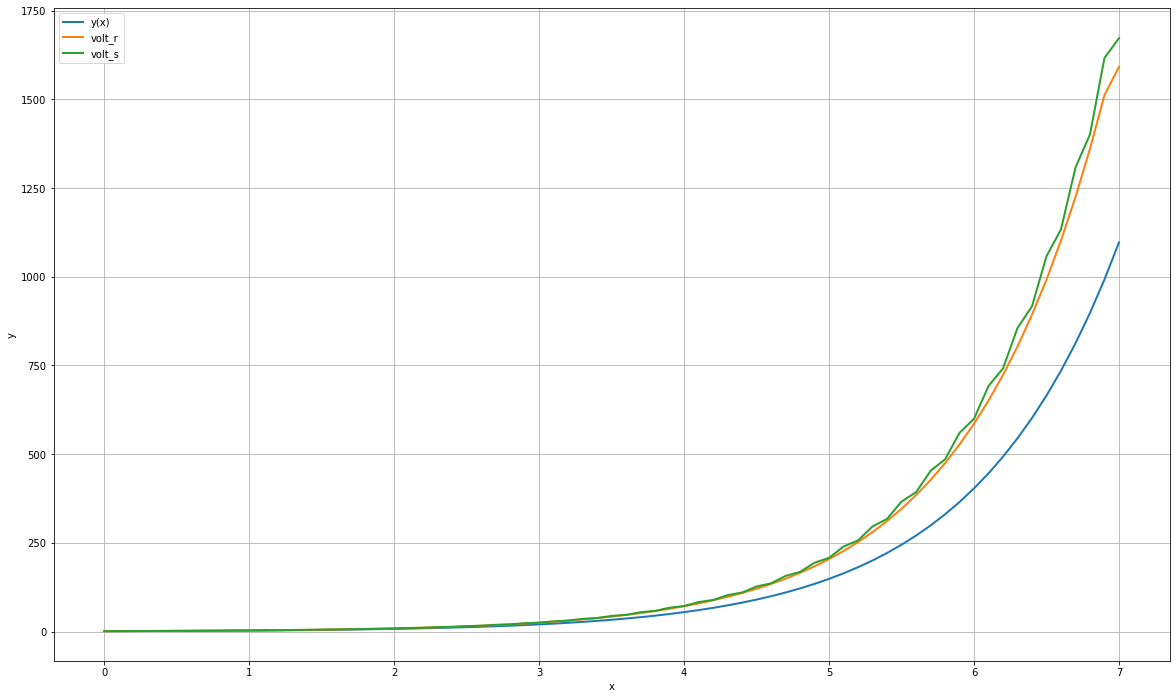

In [10]:
h = float(input("Введите длинну шага: h = "))

ans_r = volt_2_rect(K, f, a, b, h)
ans_s = volt_2_simps(K, f, a, b, h)

x_list = list(np.arange(a, b + h/2, h))

y_list = [y(x) for x in x_list]

plt.figure(figsize=(20, 12))
# plt.axis('equal')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_list, y_list, label="y(x)", linewidth=2)
plt.plot(x_list, ans_r, label="volt_r", linewidth=2)
plt.plot(x_list, ans_s, label="volt_s", linewidth=2)
plt.legend(loc=2)
# print("y(x) \t volt")
# for i in range(len(ans)):
#     print(y_list[i], ans[i])

print("Среднеквадратичноая погрешность с методом трапеций:", math.sqrt(sum([(y_list[i] - ans_r[i])**2 for i in range(len(ans_r))]))/len(ans_r))
print("Среднеквадратичноая погрешность с методом симпсона:", math.sqrt(sum([(y_list[i] - ans_s[i])**2 for i in range(len(ans_s))]))/len(ans_s))

In [41]:
def culc(y, h, x, n, K, f):
    yk = []
    A = [1/2 if k == 0 or k == n-1 else 1 for k in range(n)]
    for i in range(n):
        s = 0
        for j in range(n):
            s += A[j] * K(x[i], x[j]) * y[j]
            
        yk.append(f(x[i]) + h * s)        
        
    return yk

def norm(y):
    return math.sqrt(sum([x*x for x in y]))

def volt_2_simple_iteration(K, f, a, b, h, eps=0.0001):
    """
    Метод простых итераций
    
    :param K: Ядро уравнения
    :param f: Правая  часть (задаются аналитически)
    :param a: Начало отрезка интегрирования
    :param b: Конец отрезка
    :param h: Шаг сетки
    :return: Вектор y приближений к  решению в узлах сетки
    """
    x = np.arange(a, b + h/2, h)
    n = len(x)
    y = [f(i) for i in x]
#     print(y)
    ans = []
    yk = culc(y, h, x, n, K, f)
    
#     print(yk)
#     return yk
    i = 0 
#     print(yk)
#     print(norm(yk))
#     print( norm([yk[i] - y[i] for i in range(len(y))]))
    while norm([yk[i] - y[i] for i in range(len(y))])/norm(yk) > eps and i < 20:
        y = yk
        yk = culc(y, h, x, n, K, f)
#         print(yk)
        i += 1
#         ans.append(y)
        
    print(i)
    return y
    

In [42]:
K = lambda x, s: math.exp(x*x - s*s)
f = lambda x: math.exp(x*x)
a = 0
b = 1
h = 0.01



y = lambda x: math.exp(x*x + x)

20
Среднеквадратичноая погрешность с методом трапеций: 2.9128035835270665


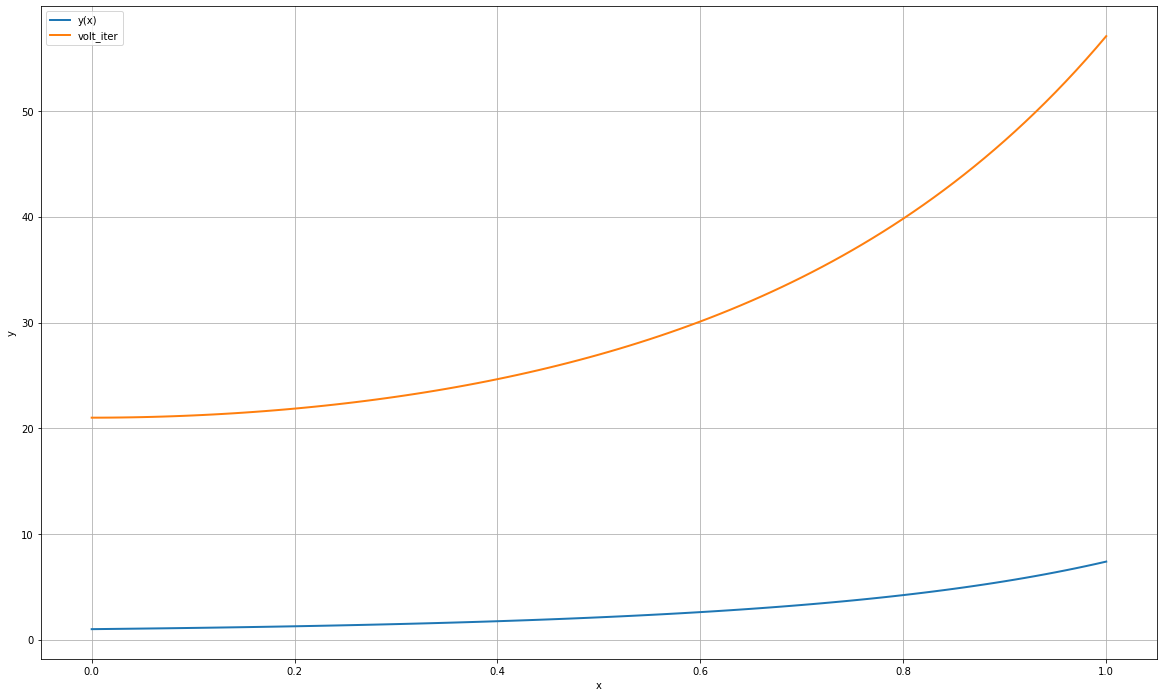

In [43]:
# h = float(input("Введите длинну шага: h = "))

ans = volt_2_simple_iteration(K, f, a, b, h)

x_list = list(np.arange(a, b + h/2, h))

y_list = [y(x) for x in x_list]

plt.figure(figsize=(20, 12))
# plt.axis('equal')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_list, y_list, label="y(x)", linewidth=2)
# for yi in ans:
#     plt.plot(x_list, yi, label="volt_iter", linewidth=2)
plt.plot(x_list, ans, label="volt_iter", linewidth=2)
plt.legend(loc=2)
# print("y(x) \t volt")
# for i in range(len(ans)):
#     print(y_list[i], ans[i])

print("Среднеквадратичноая погрешность с методом трапеций:", math.sqrt(sum([(y_list[i] - ans[i])**2 for i in range(len(ans))]))/len(ans))

In [ ]:
def culc(y, h, x, n, K, f):
    yk = [x for x in y]
    for i in range(n):
        s = 0;
        for j in range(i):
            s += 2 * K(x[i], x[j])*y[j]
            
        
            
def norm(y):
    return math.sqrt(sum[x*x for x in y])

def volt_2_nonlin()(K, f, a, b, h):
    """
    Метод квадратур для нелинейных уравнений
    
    :param K: Ядро уравнения
    :param f: Правая  часть (задаются аналитически)
    :param a: Начало отрезка интегрирования
    :param b: Конец отрезка
    :param h: Шаг сетки
    :return: Вектор y приближений к  решению в узлах сетки
    """
    
    
    x = np.arange(a, b + h/2, h)
    n = len(x)
    y = [f(x[0])]
    A = [1 if i == 0  else 1/2 for i in range(0, n)]
    for i in range(1, n):
        s = 0
        for j in range(0, i):
            A_loc = [1/2 if i == 0  else 1 for i in range(0, n)]
            s += h * A_loc[j] * K(x[i], x[j], y[j])
            
        tmp = (f(x[i]) + s)/(1 - h * A[i] * K(x[i], x[i]))
        y.append(tmp)
        
#     print(y)
        
        
    return y
    